Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline



Load the Dataset

In [3]:
data = pd.read_csv(r'C:\Users\valup\Desktop\jupyter\car price prediction prjt\car_data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(data.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


Explore the data

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [6]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


Data Preprocessing

In [7]:
# check null value
null_values = data.isna().sum()
print(null_values)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


Data Visualization

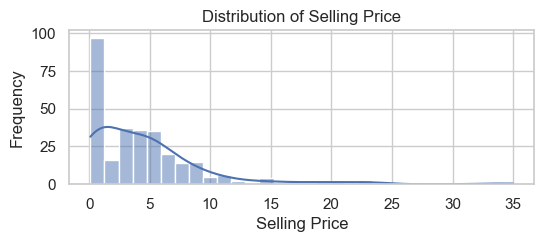

In [18]:
# Setting a style for all plots
sns.set(style="whitegrid")

# 1. Distribution of Selling Price
plt.figure(figsize=(6, 2))
sns.histplot(data['Selling_Price'], kde=True, bins=30)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

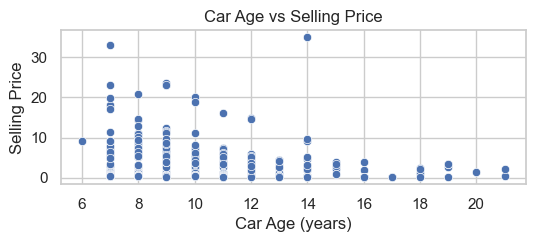

In [19]:
# 2. Car Age vs Selling Price
# Calculate car age from the 'Year' column
data['Car_Age'] = 2024 - data['Year']  # Assuming the current year is 2024

plt.figure(figsize=(6, 2))
sns.scatterplot(x='Car_Age', y='Selling_Price', data=data)
plt.title('Car Age vs Selling Price')
plt.xlabel('Car Age (years)')
plt.ylabel('Selling Price')
plt.show()

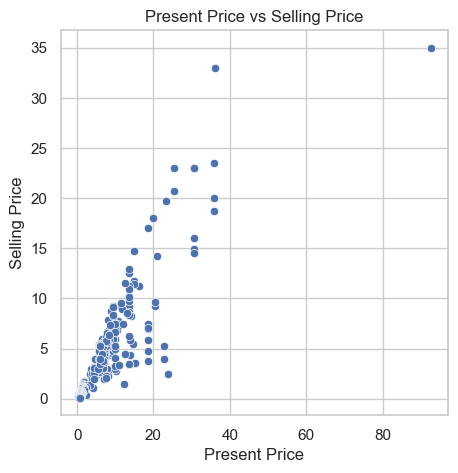

In [26]:
# 3. Present Price vs Selling Price
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=data)
plt.title('Present Price vs Selling Price')
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.show()

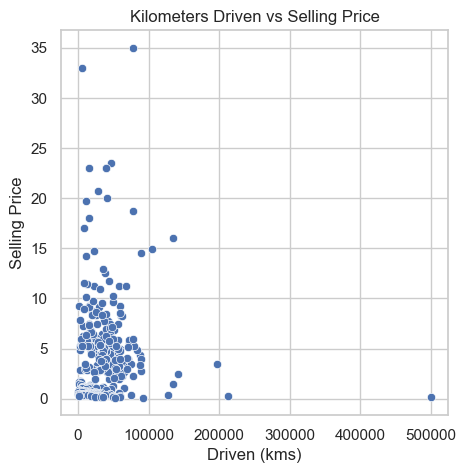

In [28]:
# 4. Driven_kms vs Selling Price
plt.figure(figsize=(5, 5))
sns.scatterplot(x='Driven_kms', y='Selling_Price', data=data)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Driven (kms)')
plt.ylabel('Selling Price')
plt.show()

Splitting the data 

In [34]:
# Encode categorical variables using LabelEncoder

le = LabelEncoder()
var_mod = data.select_dtypes(include='object').columns

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [38]:
# Split the dataset into training and testing sets

X = data.drop(['Selling_Price'], axis=1)
y = data['Selling_Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Defining the Model

In [39]:
# Create a Linear Regression model

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Predicting the Model

In [40]:
# Make predictions on the test set

y_pred = model.predict(x_test)

Evaluating the Model

In [41]:
# Calculate Mean Squared Error and R-squared for evaluation

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.314673802040966
R-squared: 0.7677620171275483


Save Model

In [44]:
import joblib

# Save the model
joblib.dump(model, 'car_price_model.pkl')

['car_price_model.pkl']